[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ourownstory/neural_prophet/blob/main/tutorials/feature-use/plotly.ipynb)

# Visualizing NeuralProphet's Forecasts

This notebook demonstrates what different plotting options are available in NeuralProphet.

As different plotting backends have different advantages and disadvantages, NeuralProphet supports multiple plotting backends:
* `plotly`: Interactive plots, but can be slow for large datasets and cannot be displayed in the docs version
* `plotly-static`: Static plots to be displayed in the docs version
* `plotly-resampler`: Interactive plots, that are faster for large datasets, but might not properly vizualise in some evnironments
* `matplotlib`: Static plots, but will be deprecated soon

Let's start with the same model as in the tutorials:

In [14]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Load the dataset from the CSV file using pandas
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial04.csv")

# Reduce the dataset to two years to better show the data
df = df.iloc[-365 * 2 :]

# Model and prediction
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=10,
    # Disable seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    n_lags=10,
)
m.add_lagged_regressor("temperature")

m.set_plotting_backend("plotly-static")

metrics = m.fit(df)
forecast = m.predict(df)

Finding best initial lr:   0%|          | 0/222 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 45it [00:00, ?it/s]

## Plot the forecast

Plot the forecast of the model and the actual data.

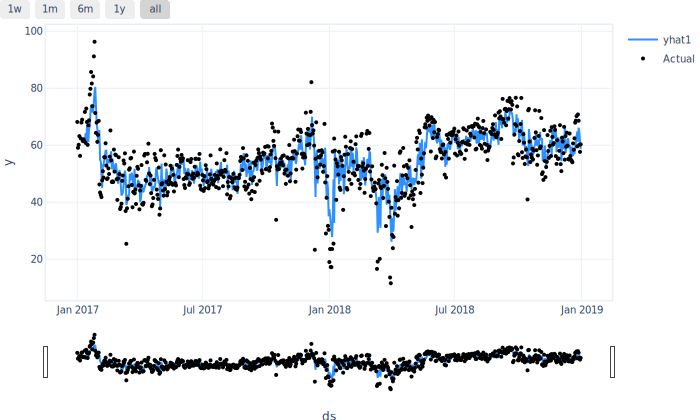

In [15]:
m.plot(forecast)

## Plot the components

Plot the components of the forecast, i.e. trend, seasonality, and holidays. You can choose to [plot all components or only a subset with `components`.](https://neuralprophet.com/code/forecaster.html?highlight=lot_parameters#neuralprophet.forecaster.NeuralProphet.plot_parameters)

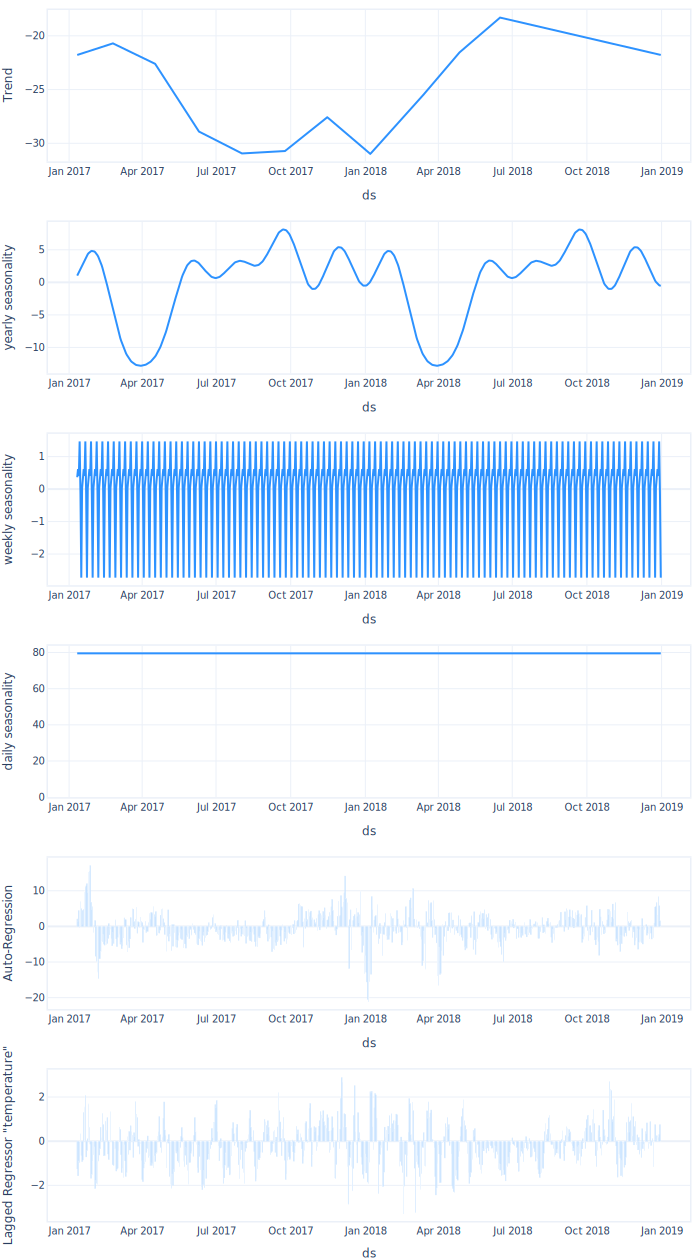

In [16]:
m.plot_components(forecast)

## Plot the parameters

To get a better understanding of the model, you can plot the parameters of the model. As in `plot_components`, you can choose to [plot all parameters or only a subset of parameters.](https://neuralprophet.com/code/forecaster.html?highlight=plot_parameters#neuralprophet.forecaster.NeuralProphet.plot_parameters)

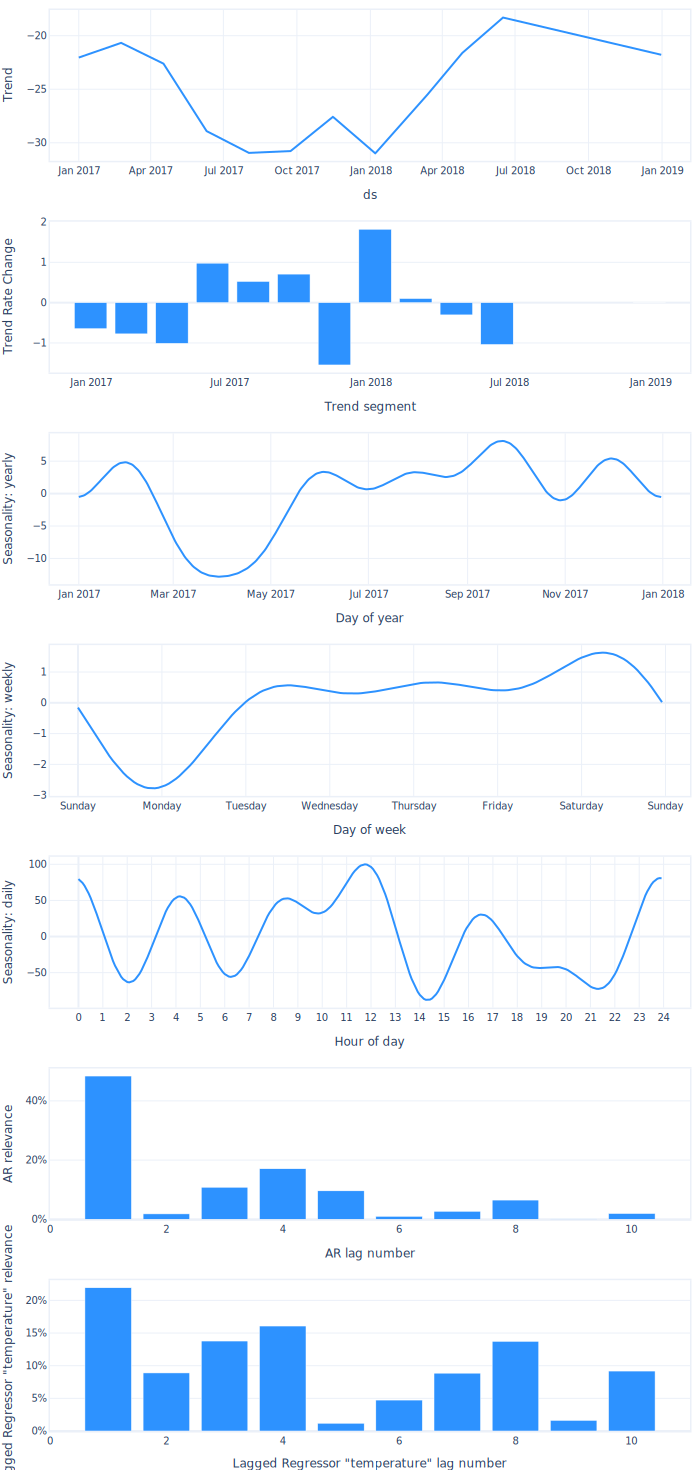

In [17]:
m.plot_parameters()

## Plotting of multiple forecasts

Neuralprophet can generate multiple step ahead forecasts by specifying the `n_forecasts` parameter.

In [18]:
# Model and prediction
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=10,
    # Disable seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    n_lags=10,
    n_forecasts=10,
)
m.add_lagged_regressor("temperature")

m.set_plotting_backend("plotly-static")

metrics = m.fit(df)
forecast = m.predict(df)

Finding best initial lr:   0%|          | 0/222 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 45it [00:00, ?it/s]

If we plot our forecast as before, all step ahead forecasts will be plotted. However, we can also plot each step ahead forecast individually.

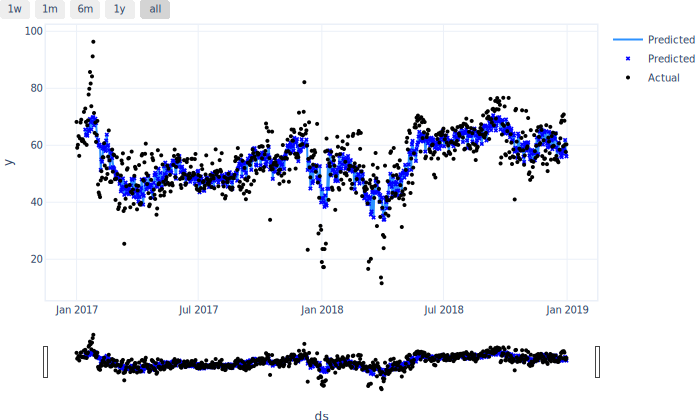

In [24]:
m.plot(forecast, forecast_in_focus=4)

Trend, seasonality, and holidays are the same for all step ahead forecasts, so they are only plotted once. But autoregression and lagged regressors are different for each step ahead forecast. If `forecast_in_focus` is not specified, the components plot shows the component share to each forecast step in different colors. If `forecast_in_focus` is specified, the components plot shows the component share of the specified forecast step.

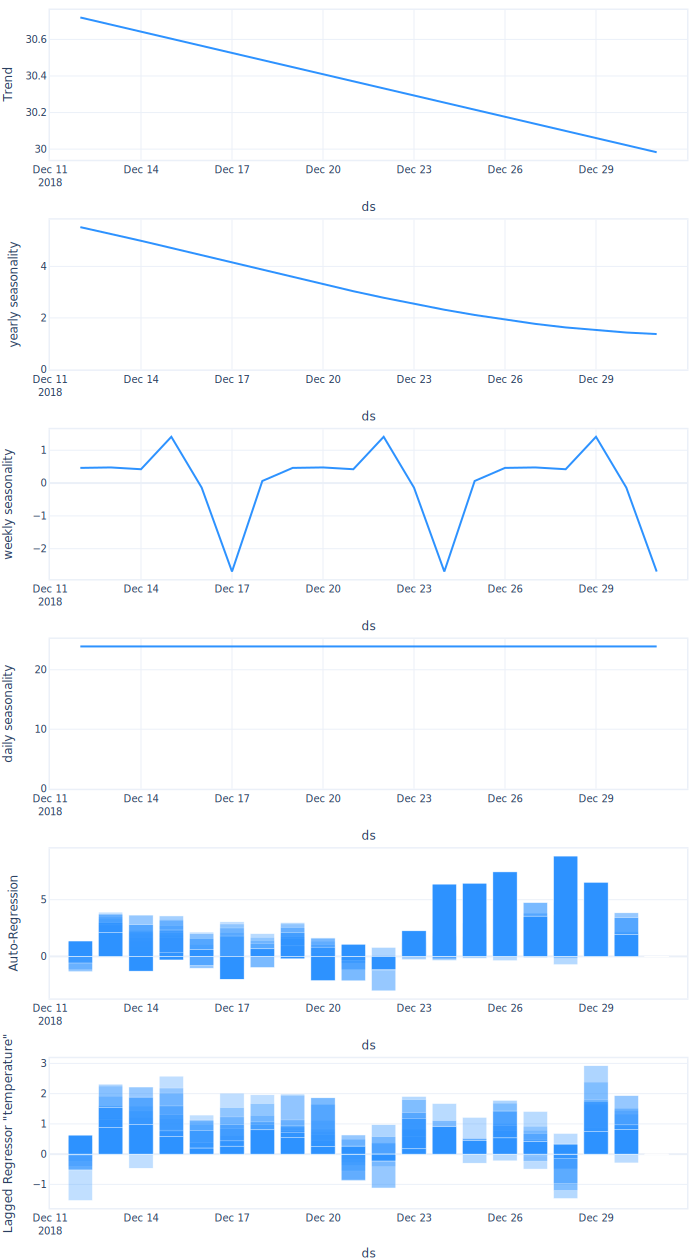

In [31]:
# Show only last 20 days to better see the components
m.plot_components(forecast[-20:])

As the parameters are the same for all step ahead forecasts, they are only plotted once.

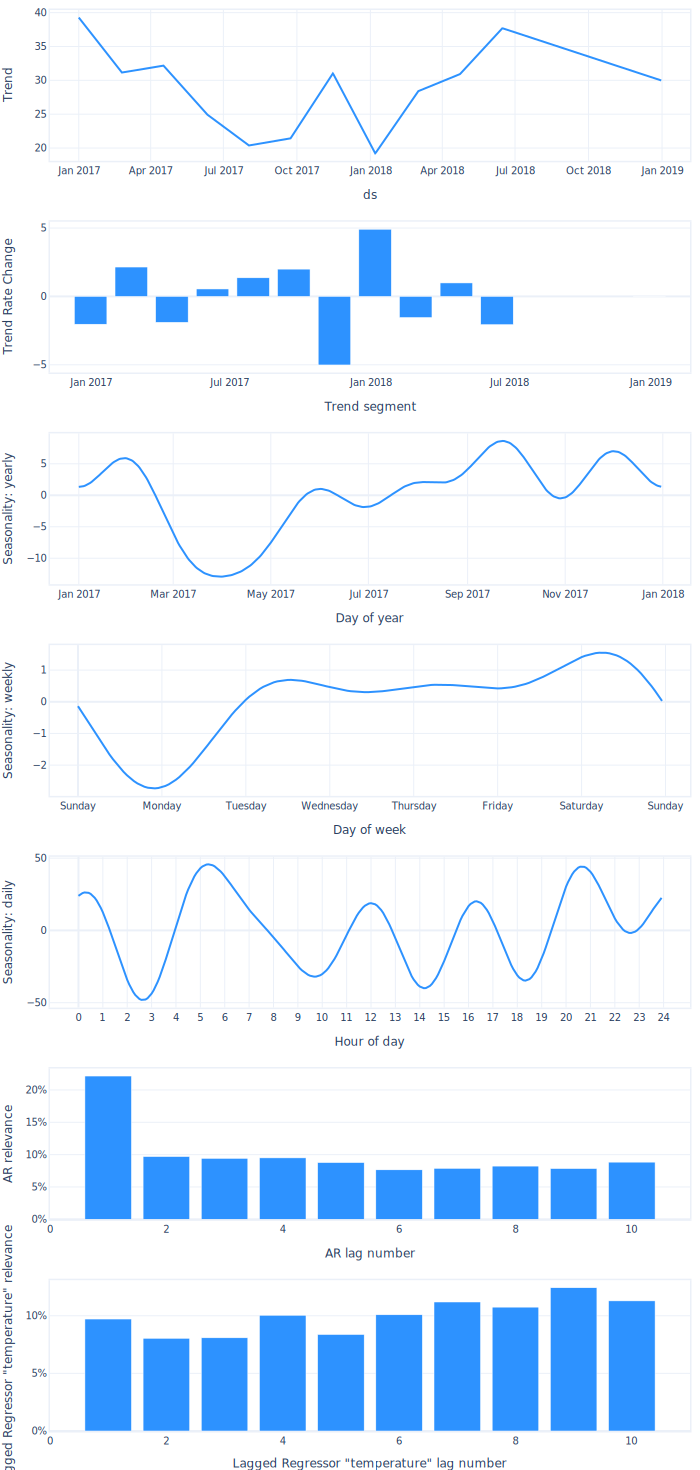

In [32]:
m.plot_parameters()